### Data set clean: 
#### 1. nan value removing; 
#### 2. resize descending image to the same size of ascending image.

### **1. Remove nan values**

In [1]:
import os
os.chdir('..')
from notebooks import config
from utils.geotif_io import readTiff, writeTiff
from utils.imgShow import imgShow
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np


In [4]:
idx = '10'
# for id in range(0,37):    #
  # idx = str(id+1).rjust(2,'0')
print('process -> scene ' + idx)
path_as = config.root_proj + '/data/dset/s1_ascend/scene'+ idx + '_s1as.tif'
path_des = config.root_proj + '/data/dset/s1_descend/scene' + idx + '_s1des.tif'
s1_as, s1_as_info = readTiff(path_as)
s1_des, s1_des_info = readTiff(path_des)
print('ascending min and max:', s1_as.min(), s1_as.max())
print('descending min and max:', s1_des.min(), s1_des.max())
if np.isnan(s1_as.min()) or np.isnan(s1_as.max()):
  s1_as[np.isnan(s1_as)] = 0
  writeTiff(im_data = s1_as, 
      im_geotrans = s1_as_info['geotrans'], 
      im_geosrs = s1_as_info['geosrs'], 
      path_out = path_as)
  print('re-writen -> ', path_as)
if np.isnan(s1_des.min()) or np.isnan(s1_des.max()):
  s1_des[np.isnan(s1_des)] = 0
  writeTiff(im_data = s1_des, 
      im_geotrans = s1_des_info['geotrans'], 
      im_geosrs = s1_des_info['geosrs'], 
      path_out = path_des)
  print('re-writen -> ', path_des)


process -> scene 10
ascending min and max: -64.54335 4.3511105
descending min and max: -68.47471 5.853177


#### Check images

check scene 10
s1_as shape:  (3397, 3686)
s1_des shape:  (3397, 3686)


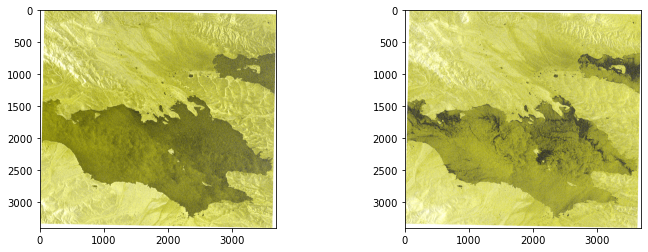

In [10]:
### check the scene and the truth
idx = '10'
print('check scene ' + idx)
path_as = config.root_proj + '/data/dset/s1_ascend/scene'+ idx + '_s1as.tif'
path_des = config.root_proj + '/data/dset/s1_descend/scene' + idx + '_s1des.tif'
s1_as, s1_as_info = readTiff(path_as)
s1_des, s1_des_info = readTiff(path_des)
print('s1_as shape: ', (s1_as_info['row'],s1_as_info['col']))
print('s1_des shape: ', (s1_des_info['row'],s1_des_info['col']))
colors = ['white', 'blue']
cmap = mpl.colors.ListedColormap(colors)
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
imgShow(s1_as, color_bands=(0,0,1), clip_percent=5, per_band_clip='True')
plt.subplot(1,2,2)
imgShow(s1_des, color_bands=(0,0,1), clip_percent=5, per_band_clip='True')


### **2. Resize descending image same to ascending image**

In [11]:
idx = '10'
# for id in range(0,37):    #
  # idx = str(id+1).rjust(2,'0')
print('check -> scene ' + idx)
path_as = config.root_proj + '/data/dset/s1_ascend/scene'+ idx + '_s1as.tif'
path_des = config.root_proj + '/data/dset/s1_descend/scene' + idx + '_s1des.tif'
s1_as, s1_as_info = readTiff(path_as)
s1_des, s1_des_info = readTiff(path_des)
dif_row = s1_as_info['row']-s1_des_info['row']
dif_col = s1_as_info['col']-s1_des_info['col']
print('shape difference(row, col):', dif_row, dif_col)
if dif_row !=0 or dif_col !=0:
  width=s1_as_info['col']
  height=s1_as_info['row']
  path_out=path_des.split('.')[0]+'_resize.tif'
  !gdalwarp -co COMPRESS=LZW -ts $width $height -r near $path_des $path_out    # resize raster
  os.remove(path_des)
  os.rename(path_out,path_des)
  print('re-writen -> ', path_des)


check -> scene 10
shape difference(row, col): 0 0


### Check

check scene10
shape difference(row, col): 0 0


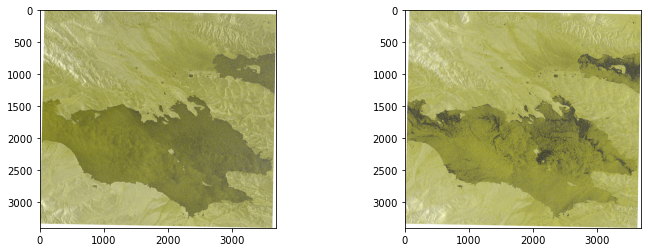

In [15]:
### check the scene and the truth
idx = '10'
print('check scene' + idx)
path_as = config.root_proj + '/data/dset/s1_ascend/scene'+ idx + '_s1as.tif'
path_des = config.root_proj + '/data/dset/s1_descend/scene' + idx + '_s1des.tif'
s1_as, s1_as_info = readTiff(path_as)
s1_des, s1_des_info = readTiff(path_des)
dif_row = s1_as_info['row']-s1_des_info['row']
dif_col = s1_as_info['col']-s1_des_info['col']
print('shape difference(row, col):', dif_row, dif_col)
colors = ['white', 'blue']
cmap = mpl.colors.ListedColormap(colors)
plt.figure(figsize=(12, 4))
plt.subplot(1,2,1)
imgShow(s1_as, color_bands=(0,0,1), clip_percent=2, per_band_clip='True')
plt.subplot(1,2,2)
imgShow(s1_des, color_bands=(0,0,1), clip_percent=2, per_band_clip='True')

